# 基于sklearn的多层神经网络算法及应用

sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

https://scikit-learn.org.cn/view/713.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

#====数据准备====#
X, y = fetch_openml('mnist_784',version=1,return_X_y=True)
X = X / 255.0

#====数据划分====#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) # 建立训练数据和测试数据
print('原始数据维度：',X.shape,'，训练数据维度：',X_train.shape,'，测试数据维度：',X_test.shape)
print('原始数据维度：',y.shape,'，训练数据维度：',y_train.shape,'，测试数据维度：',y_test.shape)

#====配置模型====#
# 第1步：导入多层感知器神经网络
from sklearn.neural_network import MLPClassifier
# 第2步：创建模型：多层感知器神经网络
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500,alpha = 1e-4,solver='sgd',verbose=10,tol=1e-4,random_state=1)
# 第3步：训练模型
mlp.fit(X_train,y_train)

#====模型评估====#
# 分类问题: 模型评估使用的是准确率accuracy，即测试数据集正确分类数与测试数据总数之比
print("Training set score: %f " % mlp.score(X_train,y_train))
print("Test set score: %f" % mlp.score(X_test,y_test))

原始数据维度： (70000, 784) ，训练数据维度： (56000, 784) ，测试数据维度： (14000, 784)
原始数据维度： (70000,) ，训练数据维度： (56000,) ，测试数据维度： (14000,)
Iteration 1, loss = 1.83338268
Iteration 2, loss = 0.84747239
Iteration 3, loss = 0.53887782
Iteration 4, loss = 0.44125965
Iteration 5, loss = 0.39202276
Iteration 6, loss = 0.36125942
Iteration 7, loss = 0.33894234
Iteration 8, loss = 0.32179021
Iteration 9, loss = 0.30743151
Iteration 10, loss = 0.29519571
Iteration 11, loss = 0.28446023
Iteration 12, loss = 0.27491204
Iteration 13, loss = 0.26666715
Iteration 14, loss = 0.25891312
Iteration 15, loss = 0.25192106
Iteration 16, loss = 0.24537956
Iteration 17, loss = 0.23919133
Iteration 18, loss = 0.23340987
Iteration 19, loss = 0.22804075
Iteration 20, loss = 0.22301129
Iteration 21, loss = 0.21803458
Iteration 22, loss = 0.21344614
Iteration 23, loss = 0.20904373
Iteration 24, loss = 0.20490430
Iteration 25, loss = 0.20075487
Iteration 26, loss = 0.19693064
Iteration 27, loss = 0.19313319
Iteration 28, loss = 0.1894

# 模型应用：AI手写体数字识别

AI手写体数字识别为0

实际手写体数字图片为:


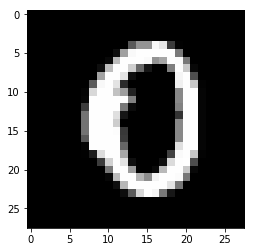

In [7]:
import numpy as np                  # python基本库，用于科学计算  
import matplotlib.pyplot as plt     # python的绘图库
# 测试集样本验证
imageNo = 0
print('AI手写体数字识别为%d\n' % mlp.predict(np.array(X_test.iloc[imageNo,:]).reshape(1,-1)))
print('实际手写体数字图片为:')
image = np.array(X_test.iloc[imageNo,:],dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')

实际手写体数字图片为:

AI手写体数字识别为2


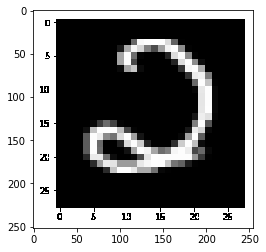

In [8]:
# 新导入样本测试
from PIL import Image
print('实际手写体数字图片为:\n')
image = Image.open('handwrittenNumber_3.png').convert('F')
plt.imshow(image)
image = image.resize((28,28))
print('AI手写体数字识别为%d' % mlp.predict(np.array(image).reshape(1,-1)))

# Python实现多分类P-R、ROC曲线

1、理解macro-P和micro-P、macro-R和micro-R、macro-TPR和micro-TPR、macro-FPR和micro-FPR计算方式的不同

2、关于绘制多分类的ROC、PR曲线，建议现看下

https://zhuanlan.zhihu.com/p/266386193

https://blog.zhujian.life/posts/2bbcad17.html

In [9]:
def plot_roc_curve_multiclass(y_test, y_score, plot_class=0):
    n_classes = y_score.shape[1]        # 设置手写体数字识别分类数
    # 计算每一类的ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area（方法二）
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area（方法一）
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i]) # 根据all_fpr通过插值计算得到对应的累加mean_tpr

    # Finally average it and compute AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    lw=2
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
    # 只需画出具体的某一类的ROC曲线
    # plot_class = 2 
    plt.figure()
    lw = 2
    plt.plot(fpr[plot_class], tpr[plot_class], color='darkorange',
            lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

手写体数字识别结果维度： (14000, 10)
手写体数字识别标签维度： (14000, 10)


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


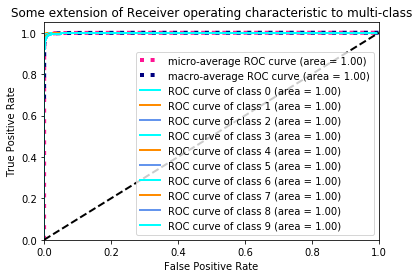

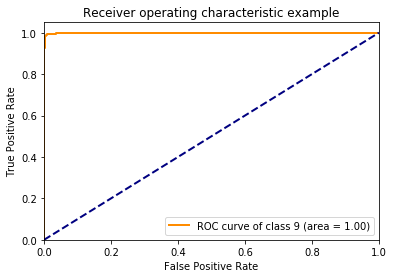

In [15]:
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp
# 测试样本模型预测概率
ypred_score = mlp.predict_proba(X_test) # 测试样本预测属于第0-9类的概率
print('手写体数字识别结果维度：', ypred_score.shape)
# 将标签二值化，构建样本*标签矩阵
ytrue_test = label_binarize(np.array(y_test,dtype='int'), classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print('手写体数字识别标签维度：', ytrue_test.shape)
# 绘制ROC曲线
from sklearn.metrics import roc_curve
plot_roc_curve_multiclass(ytrue_test, ypred_score, plot_class=2)